In [2]:
import pandas as pd
import shap
from sklearn.linear_model import Ridge
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
def split_data(data, features, target):
    """Split on test/train/val.

    Args:
        df (pd.DataFrame): input dataset
        features (list): list of features
        target (str): target column name
    Returns:
        tuple: X_train, X_test, y_train, y_test, X_val, y_val
    """
    # Split on test/train 80/20
    # split startified on target
    X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.3, random_state=1)
    # make validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    return X_train, X_test, y_train, y_test, X_val, y_val

In [4]:
def train_model(model, X_train, y_train, X_test, y_test, X_val, y_val):
    """Train model and return predictions.

    Args:
        model (sklearn model): model to train
        X_train (pd.DataFrame): training data
        y_train (pd.DataFrame): training labels
        X_test (pd.DataFrame): test data
        y_test (pd.DataFrame): test labels
        X_val (pd.DataFrame): validation data
        y_val (pd.DataFrame): validation labels
    
    Returns:
        tuple: mae, model
    """
    from sklearn.metrics import mean_absolute_error
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    # Evaluaate
    mae = mean_absolute_error(y_val, y_pred)
    return mae, model

In [35]:
df = pd.read_csv('Ant_Lif.csv')
df

,hip,neck20,coffee15,tea15,soda15,evsmok15,smknow15,asa15,smokstat_s1,bmi_s1,weight,waist,height,weight20,nsrrid,ahi_c0h4
0,99.0,38.3,2.0,0.0,1.0,1.0,0.0,1.0,2.0,21.777553,65.0,86.0,178.0,69.0,200001,1.278296
1,122.0,40.5,0.0,0.0,0.0,0.0,0.2,1.0,0.0,32.950680,93.0,107.0,168.0,93.0,200002,14.505495
2,95.0,39.0,0.0,3.0,0.0,0.0,0.8,0.0,0.0,24.114150,51.0,82.0,145.0,50.7,200003,4.184100
3,99.0,39.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.185185,64.0,85.0,180.0,65.4,200004,0.199336
4,97.0,32.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,23.309053,56.0,76.0,155.0,56.0,200005,2.756757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,95.0,41.5,2.0,0.0,0.0,0.0,1.0,0.0,0.0,25.693134,70.5,99.0,166.0,70.8,205800,10.743551
5800,99.0,34.9,6.0,0.0,1.0,1.0,1.0,1.0,1.0,26.730372,83.6,99.0,176.0,82.8,205801,13.198483
5801,101.0,37.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,24.228571,75.0,91.0,175.0,74.2,205802,2.019231
5802,98.0,39.0,0.0,0.0,1.0,0.0,0.8,1.0,0.0,25.374483,76.8,93.0,176.0,78.6,205803,1.186650


In [36]:
feature_dict = {'smokstat_s1':'smoke status', 
                'smknow15':'smoke cigarettes now?', 
                'evsmok15':'ever smoked?', 
                'height':'height', 
                'weight20':'weight at blood pressure measurement', 
                'neck20':'neck circumference', 
                'bmi_s1':'bmi', 
                'weight':'weight', 
                'waist':'waist circumference', 
                'tea15':'Number of cups of tea per day',
                'soda15':'Number of cups of soda per day', 
                'nsrrid':'identifier link', 
                'asa15':'any aspirin in last 2 weeks', 
                'hip':'hip cicumference', 
                'coffee15':'number of cups of coffee per day'}

In [37]:
df.rename(columns=feature_dict, inplace=True)
target = 'ahi_c0h4'
features = df.columns.tolist()
features.remove(target)
df

,hip cicumference,neck circumference,number of cups of coffee per day,Number of cups of tea per day,Number of cups of soda per day,ever smoked?,smoke cigarettes now?,any aspirin in last 2 weeks,smoke status,bmi,weight,waist circumference,height,weight at blood pressure measurement,identifier link,ahi_c0h4
0,99.0,38.3,2.0,0.0,1.0,1.0,0.0,1.0,2.0,21.777553,65.0,86.0,178.0,69.0,200001,1.278296
1,122.0,40.5,0.0,0.0,0.0,0.0,0.2,1.0,0.0,32.950680,93.0,107.0,168.0,93.0,200002,14.505495
2,95.0,39.0,0.0,3.0,0.0,0.0,0.8,0.0,0.0,24.114150,51.0,82.0,145.0,50.7,200003,4.184100
3,99.0,39.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.185185,64.0,85.0,180.0,65.4,200004,0.199336
4,97.0,32.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,23.309053,56.0,76.0,155.0,56.0,200005,2.756757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,95.0,41.5,2.0,0.0,0.0,0.0,1.0,0.0,0.0,25.693134,70.5,99.0,166.0,70.8,205800,10.743551
5800,99.0,34.9,6.0,0.0,1.0,1.0,1.0,1.0,1.0,26.730372,83.6,99.0,176.0,82.8,205801,13.198483
5801,101.0,37.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,24.228571,75.0,91.0,175.0,74.2,205802,2.019231
5802,98.0,39.0,0.0,0.0,1.0,0.0,0.8,1.0,0.0,25.374483,76.8,93.0,176.0,78.6,205803,1.186650


Do SHAP on test set

In [ ]:
# Split data
X_train, X_test, y_train, y_test, X_val, y_val = split_data(df, features, target)

model = Ridge(alpha=4.434528937795567, random_state=1, solver='sparse_cg')
model.fit(X_train, y_train)

#create an explainer
explainer = shap.LinearExplainer(model, X_train)
shap_values_test = explainer.shap_values(X_test)

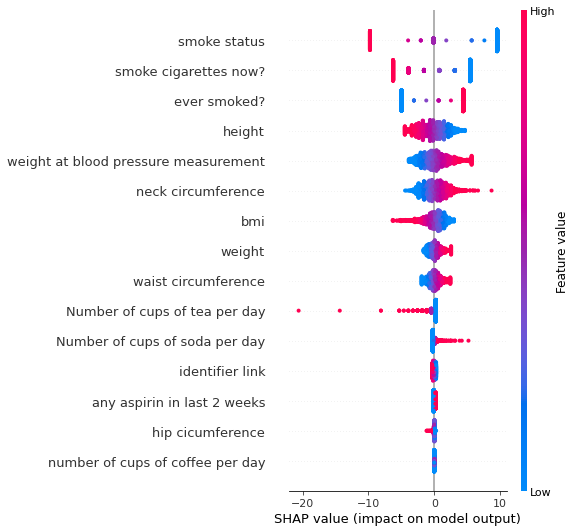

In [39]:
#It plots all the SHAP values for each feature for each sample. It shows both the distribution of the impacts each feature has on the model output and the direction of the impact.
shap.summary_plot(shap_values_test, X_test, show=False)
plt.savefig('cheap_feature_importance_test.jpg')

In [9]:
plt.savefig('cheap_feature_importance_test.png')

<Figure size 432x288 with 0 Axes>

On training set

In [40]:
X_train, X_test, y_train, y_test, X_val, y_val = split_data(df, features, target)

model = Ridge(alpha=4.434528937795567, random_state=1, solver='sparse_cg')
model.fit(X_train, y_train)

#create an explainer
explainer = shap.LinearExplainer(model, X_train)
shap_values_train = explainer.shap_values(X_train)

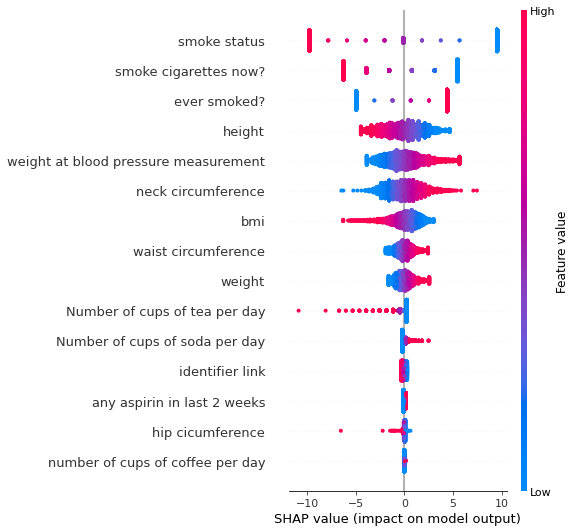

In [41]:
shap.summary_plot(shap_values_train, X_train, show=False)
plt.savefig('cheap_feature_importance_train.jpg')

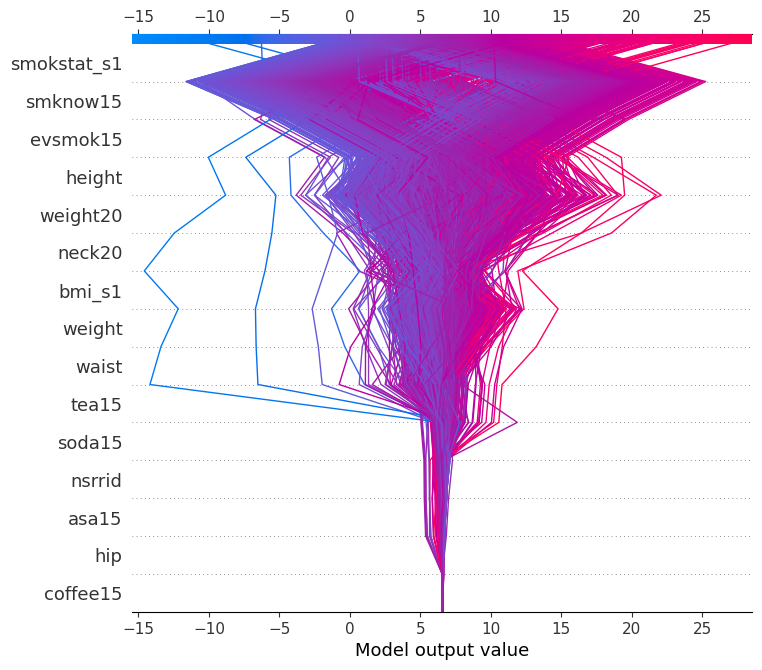

In [17]:
# It plots the cumulative SHAP values for each feature to show how the final prediction is formed from the base value.
shap.decision_plot(explainer.expected_value, shap_values_test, X_test)

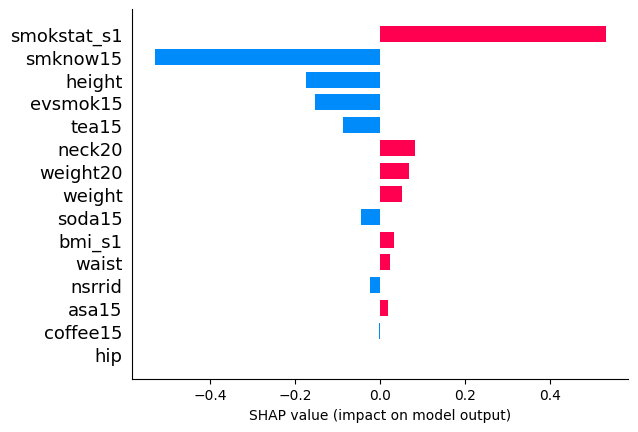

In [28]:
#It shows the average SHAP value (magnitude of impact) for each feature across all samples.
shap_values_sum = np.mean(shap_values_test, axis=0)
shap.bar_plot(shap_values_sum, max_display=20, feature_names=features)

Do SHAP on validation set